In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Dense, Activation



In [0]:
def plt_dyn(x, yval, ytrain, ax, colors=['b']):
  ax.plot(x, yval, 'b', label='Validation loss')
  ax.plot(x, ytrain, 'r', label='Training loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
op_dim = 10
ip_dim = x_train.shape[1]
batch_size = 128
epoch = 20



## Model 1

In [12]:
model = Sequential()
model.add(Dense(output_dim=op_dim, input_dim = ip_dim, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))
              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="softmax", units=10)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 1.2718 - acc: 0.7024 - val_loss: 0.8133 - val_acc: 0.8267
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.7166 - acc: 0.8396 - val_loss: 0.6094 - val_acc: 0.8582
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5876 - acc: 0.8591 - val_loss: 0.5273 - val_acc: 0.8735
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5257 - acc: 0.8682 - val_loss: 0.4813 - val_acc: 0.8803
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4880 - acc: 0.8741 - val_loss: 0.4516 - val_acc: 0.8850
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.4621 - acc: 0.8790 - val_loss: 0.4305 - val_acc: 0.8884
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.4429 - acc: 0.8824 - val_loss: 0.4136 - val_acc

Test score: 0.33596964040398597
Test accuracy: 0.9097


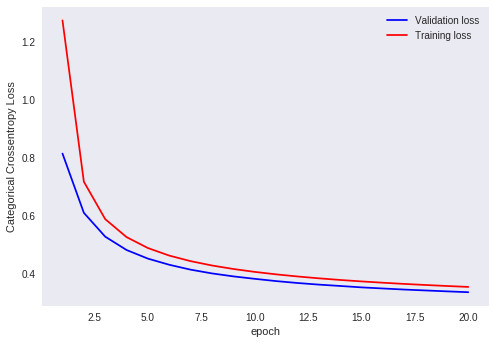

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epoch+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 2

In [34]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(ip_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(op_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2334 - acc: 0.9320 - val_loss: 0.1126 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0847 - acc: 0.9744 - val_loss: 0.0859 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 6s 104us/st

Test score: 0.1092325578252734
Test accuracy: 0.978


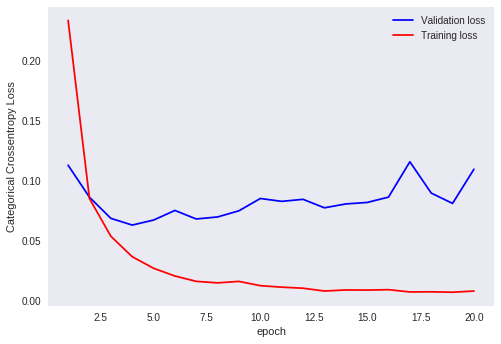

In [35]:
score = model_relu.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epoch+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 3

In [27]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(ip_dim,), kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(op_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

Test score: 0.056153808252408635
Test accuracy: 0.9853


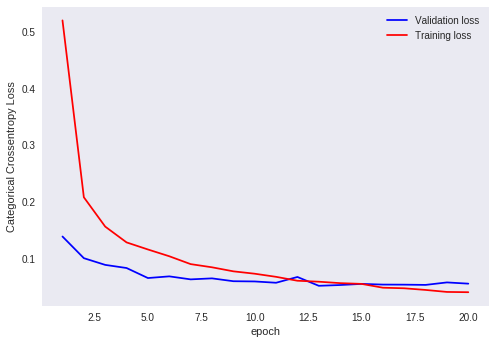

In [29]:
score = model_relu.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epoch+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 4

In [30]:
model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(ip_dim,), kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(op_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

Test score: 0.070341537701356
Test accuracy: 0.9829


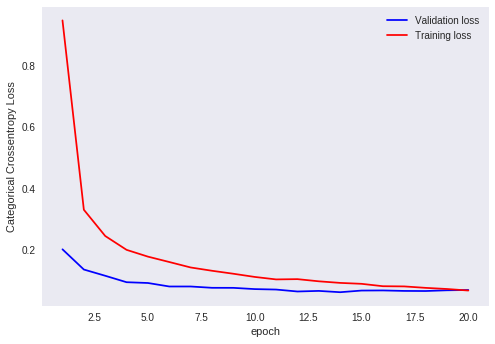

In [31]:
score = model_relu.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epoch+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

## Model 5

In [32]:
model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(ip_dim,), kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(op_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
__________

Test score: 0.06222468323039939
Test accuracy: 0.9848


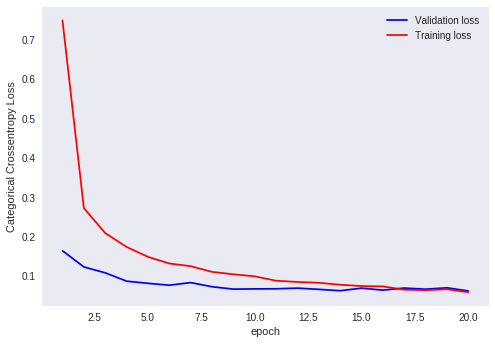

In [33]:
score = model_relu.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epoch+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dyn(x, vy, ty, ax)

# Conclusion

**Architecture**:


1.   **Model 1**: Basic Softmax
2.   **Model 2**: input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer
3.   **Model 3**: input-ReLu(1024)-ReLu(512)-sigmoid(output)-AdamOptimizer
4.   **Model 4**: input-ReLu(1024)-ReLu(512)-Relu(128)-Relu(64)-sigmoid(output)-AdamOptimizer_wBN_Dropout
5.   **Model 5**: input-ReLu(1024)-ReLu(512)-Relu(512)-Relu(64)-sigmoid(output)-AdamOptimizer_wBN_Dropout


| Model | Train loss | Validation loss | Test Accuracy |
| --- | --- | --- | --- |
| Model 1 | 0.354 | 0.336 | 90.97 % |
| Model 2 | 0.007 | 0.109 | 97.80 % |
| Model 3 | 0.041 | 0.056 | 98.53 % |
| Model 4 | 0.068 | 0.070 | 98.29 % |
| Model 5 | 0.059 | 0.062 | 98.48 % |
